Discrete Fréchet Distance: 1.1712
Generated Points:
Point 0: (0.00, 0.00)
Point 1: (1.00, -0.00)
Point 2: (1.74, -0.68)
Point 3: (2.73, -0.56)
Point 4: (3.57, -0.00)
Point 5: (4.55, 0.18)
Point 6: (5.50, -0.13)
Point 7: (6.48, -0.32)
Point 8: (7.45, -0.08)
Point 9: (8.45, -0.13)


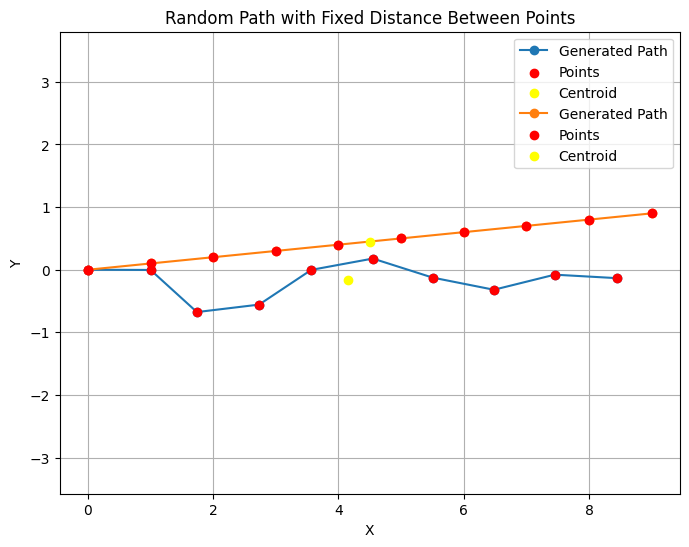

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(x, y, n_points, theta_range, d_max):
    """
    Generate n_points points starting from (x, y), where each point is positioned
    at a fixed distance (d_max) from the previous point at a random angle within theta_range.
    
    Parameters:
        x (float): Starting x-coordinate.
        y (float): Starting y-coordinate.
        n_points (int): Total number of points to generate.
        theta_range (tuple): Angle range in degrees (min_angle, max_angle).
        d_max (float): Fixed distance between consecutive points.
        
    Returns:
        list: List of tuples containing the generated (x, y) coordinates.
    """
    points = [(x, y)]  # Initialize with the starting point

    for _ in range(n_points - 1):
        # Generate a random angle within the theta_range
        theta = np.radians(np.random.uniform(theta_range[0], theta_range[1]))
        
        # Calculate the new point
        x_new = points[-1][0] + d_max * np.cos(theta)
        y_new = points[-1][1] + d_max * np.sin(theta)
        
        # Append the new point to the list
        points.append((x_new, y_new))
    
    return points

def discrete_frechet_distance(P, Q):
    """
    Compute the discrete Fréchet distance between two curves P and Q.
    
    Parameters:
        P (list): A list of points [(x1, y1), (x2, y2), ...] representing the first curve.
        Q (list): A list of points [(x1, y1), (x2, y2), ...] representing the second curve.
    
    Returns:
        float: The discrete Fréchet distance.
    """
    n = len(P)
    m = len(Q)
    ca = np.full((n, m), -1.0)  # Cache array initialized with -1.0

    def recursive_frechet(i, j):
        # Base case: If already calculated, return the cached value
        if ca[i, j] > -1:
            return ca[i, j]

        # Calculate the Euclidean distance between P[i] and Q[j]
        dist = np.linalg.norm(np.array(P[i]) - np.array(Q[j]))

        if i == 0 and j == 0:  # Starting point
            ca[i, j] = dist
        elif i == 0:  # First row
            ca[i, j] = max(recursive_frechet(i, j - 1), dist)
        elif j == 0:  # First column
            ca[i, j] = max(recursive_frechet(i - 1, j), dist)
        else:  # General case
            ca[i, j] = max(
                min(
                    recursive_frechet(i - 1, j),
                    recursive_frechet(i - 1, j - 1),
                    recursive_frechet(i, j - 1),
                ),
                dist,
            )

        return ca[i, j]

    # Compute the discrete Fréchet distance for the full curves
    return recursive_frechet(n - 1, m - 1)

def calculate_centroid(points):
    """
    Calculate the centroid of a list of (x, y) tuples.

    Parameters:
        points (list): List of (x, y) tuples.

    Returns:
        tuple: The centroid as (x_c, y_c).
    """
    if not points:
        raise ValueError("The list of points is empty.")

    # Unpack the x and y coordinates
    x_coords, y_coords = zip(*points)
    
    # Calculate the centroid
    x_c = sum(x_coords) / len(points)
    y_c = sum(y_coords) / len(points)
    
    return (x_c, y_c)

def plot_points(points):
    """
    Plot the list of points using matplotlib.
    
    Parameters:
        points (list): List of (x, y) coordinates to plot.
    """
    centroid = calculate_centroid(points)
    x_coords, y_coords = zip(*points)  # Unpack the x and y coordinates

    plt.plot(x_coords, y_coords, '-o', label="Generated Path", markersize=6)
    plt.scatter(x_coords, y_coords, color='red', zorder=5, label="Points")
    plt.scatter(centroid[0], centroid[1], color='yellow', zorder=6, label="Centroid")
    plt.title("Random Path with Fixed Distance Between Points")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")

# Example Usage
start_x, start_y = 0, 0  # Starting point
n_points = 10            # Number of points to generate
theta_range = (-45, 45)  # Random angle range in degrees
d_max = 1.0              # Fixed distance between points

# Generate points
generated_points = generate_points(start_x, start_y, n_points, theta_range, d_max)

# Another set of points (e.g., a straight line for comparison)
slope = 0.1
comparison_points = [(i, slope*i) for i in range(10)]

# Calculate the discrete Fréchet distance
distance = discrete_frechet_distance(generated_points, comparison_points)

# Output the result
print(f"Discrete Fréchet Distance: {distance:.4f}")


# Print the generated points
print("Generated Points:")
for i, (px, py) in enumerate(generated_points):
    print(f"Point {i}: ({px:.2f}, {py:.2f})")

# Plot the generated points
plt.figure(figsize=(8, 6))
plot_points(generated_points)
plot_points(comparison_points)
plt.show()
